In [27]:
import networkx as nx
import seaborn as sns
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import random
import collections
from collections import defaultdict
import matplotlib.pyplot as plt 

In [28]:
#df = pd.read_csv('valuesAdjList.csv')
df = pd.read_csv('data/valuesMatrix.csv')
nameDict = df['name']
nameDict[0]
df = df.drop('name',axis=1)
# # range of lvls 1-5
#df[df['lvl'] < 5] -= 1
#df.rename(columns={'lvl': 'node'}, inplace=True)
newColBase = df['lvl'].to_numpy()
newCol = [[idx,x] for idx, x in enumerate(newColBase)]
newColInvert = [[x,idx,x-1] for idx, x in enumerate(newColBase)]

df['edges'] = newCol
df['invertedEdges'] = newColInvert
df['name'] = nameDict
df.head(10)

,lvl,edges,invertedEdges,name
0,1,"[0, 1]","[1, 0, 0]",none
1,2,"[1, 2]","[2, 1, 1]",little
2,3,"[2, 3]","[3, 2, 2]",some
3,4,"[3, 4]","[4, 3, 3]",more
4,5,"[4, 5]","[5, 4, 4]",all
5,2,"[5, 2]","[2, 5, 1]",ACCEPTANCE
6,3,"[6, 3]","[3, 6, 2]",ACHIEVEMENT
7,4,"[7, 4]","[4, 7, 3]",ADVENTURE
8,4,"[8, 4]","[4, 8, 3]",ART
9,4,"[9, 4]","[4, 9, 3]",ATTRACTIVENESS


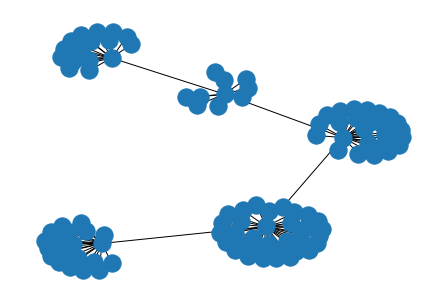

In [29]:
def bipartite(u,v,edges):
    bi = nx.Graph()
    bi.add_nodes_from(u, bipartite=0)
    bi.add_nodes_from(v, bipartite=1)
    bi.add_edges_from(edges)
    return bi


edges = df['edges'].to_list()
# edges[4][1] = 4

invertedEdges = df['invertedEdges']
invertedEdges[4][1] = 4
invertedEdges[4][0] = 5

for idx, value in enumerate(edges):
    
    if idx > 4:
        edges[idx][0] += 1
        #invertedEdges[idx][0] += 1
    
        
# # scale
u = [x for x in range(4)]
v = [x for x in range(4,len(edges)-1)]

# not a bipartite
biGraph = bipartite(u,v,edges)
nx.draw(biGraph)

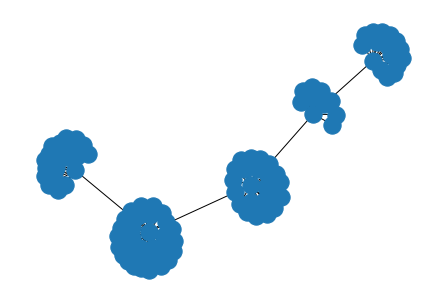

In [30]:
# create graphs
G1 = nx.Graph()
G1.add_edges_from(edges)
#adjList = nx.adjacency_matrix(G1)
nx.draw(G1)

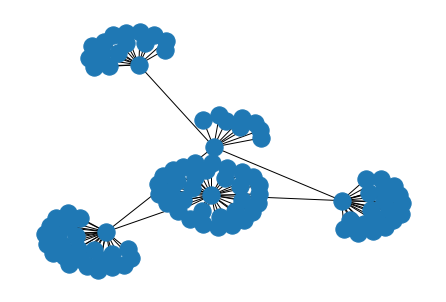

In [31]:
G2 = nx.MultiGraph()
G2.add_edges_from(invertedEdges)
#adjList2 = nx.adjacency_matrix(G1)
nx.draw(G2)

In [32]:
# connect duality of emotion. 
# e.g., hope/fear
# use 8 from Budhism
df['io'] = [[] for _ in range(len(df))]
df.head(10)

,lvl,edges,invertedEdges,name,io
0,1,"[0, 1]","[1, 0, 0]",none,[]
1,2,"[1, 2]","[2, 1, 1]",little,[]
2,3,"[2, 3]","[3, 2, 2]",some,[]
3,4,"[3, 4]","[4, 3, 3]",more,[]
4,5,"[4, 5]","[5, 4, 4]",all,[]
5,2,"[6, 2]","[2, 5, 1]",ACCEPTANCE,[]
6,3,"[7, 3]","[3, 6, 2]",ACHIEVEMENT,[]
7,4,"[8, 4]","[4, 7, 3]",ADVENTURE,[]
8,4,"[9, 4]","[4, 8, 3]",ART,[]
9,4,"[10, 4]","[4, 9, 3]",ATTRACTIVENESS,[]


In [7]:
# G2 = nx.DiGraph(adjDictValue)
# G2.remove_edges_from(nx.selfloop_edges(G2))
# nx.draw(G2, with_labels=False)
#adjDictValue[0]

In [33]:
eightEmotionSet = list((-x,x) for x in range(0,8))
eightEmotionSet
df['io'] = [ random.sample(eightEmotionSet, 1)[0] for _ in df.index ]
df.head(10)

,lvl,edges,invertedEdges,name,io
0,1,"[0, 1]","[1, 0, 0]",none,"(-5, 5)"
1,2,"[1, 2]","[2, 1, 1]",little,"(-5, 5)"
2,3,"[2, 3]","[3, 2, 2]",some,"(-2, 2)"
3,4,"[3, 4]","[4, 3, 3]",more,"(0, 0)"
4,5,"[4, 5]","[5, 4, 4]",all,"(-4, 4)"
5,2,"[6, 2]","[2, 5, 1]",ACCEPTANCE,"(-6, 6)"
6,3,"[7, 3]","[3, 6, 2]",ACHIEVEMENT,"(-6, 6)"
7,4,"[8, 4]","[4, 7, 3]",ADVENTURE,"(-2, 2)"
8,4,"[9, 4]","[4, 8, 3]",ART,"(-2, 2)"
9,4,"[10, 4]","[4, 9, 3]",ATTRACTIVENESS,"(-3, 3)"


8


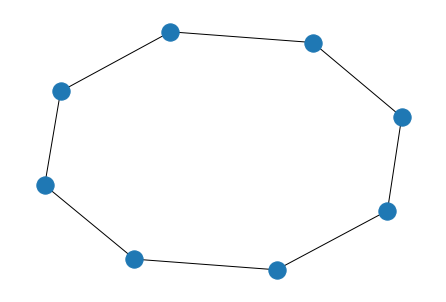

In [34]:
# eightEmotionSetConnected = [(-x,-x-1) for x in range(0,7) if x < 7]
# eightEmotionSetConnected.append((-7,0))
# print(len(eightEmotionSetConnected))

eightEmotionSetConnected = [(x,x+1) for x in range(0,7) if x < 7]
eightEmotionSetConnected.append((7,0))
print(len(eightEmotionSetConnected))



ioGraph = nx.Graph()
ioGraph.add_edges_from(eightEmotionSetConnected)
nx.draw(ioGraph)



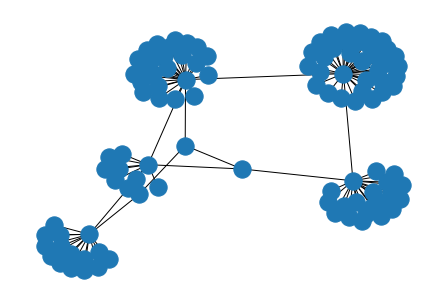

In [36]:
G1.add_edges_from(eightEmotionSetConnected)
nx.draw(G1)

In [37]:
eightEmotionSetConnected

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 0)]

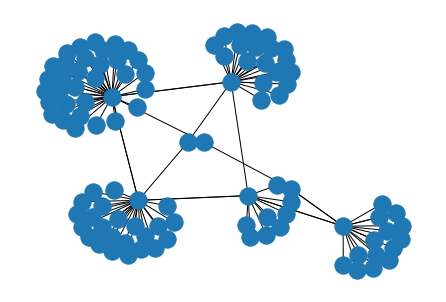

In [38]:
G2.add_edges_from(eightEmotionSetConnected)
nx.draw(G2)

In [83]:
def degreeDistro(G, scale):
    '''
    0 -> linear scale
    1 -> linear binning
    2 -> log binning
    3 -> cumsum binning
    4 -> z-scores
    '''
    n = G.number_of_nodes()
    degrees = [G.degree(n) for n in G.nodes()]
    degreesCount = collections.Counter(degrees)
    deg, cnt = zip(*degreesCount.items())
    probVector = [x/n for x in cnt]
    #normVector = [round((x-min(in_cnt))/ max(in_cnt)/min(in_cnt),2) for x in in_cnt]
    
    # Linear Scale
    if scale == 0:
        plt.title("Linear Scale")
        plt.xlabel('K')
        plt.ylabel('P(K)')
        plt.plot(deg,probVector,'o')
        plt.show()
        return probVector
    
    # Linear Binning 
    elif scale == 1:
        plt.title("Linear Binning")
        plt.xscale("log")
        plt.yscale("log")
        plt.xlabel('K')
        plt.ylabel('P(K)')
        plt.plot(deg, probVector,'o')
        plt.show()
        return probVector

    
    # Log Binning 
    elif scale == 2:
        inMax, inMin = max(probVector), min(probVector)
        logBins = np.logspace(np.log10(inMin),np.log10(inMax))
        data, bin_edges = np.histogram(probVector,bins=logBins,density=True, range=(inMin, inMax))
        bin_edges = bin_edges[:-1]
        plt.title("Log Binning & Scaling")
        plt.xscale("log")
        plt.yscale("log")
        plt.xlabel('K')
        plt.ylabel('P(K)')
        plt.plot(data, bin_edges, 'o')
        plt.show()
        return inMin, inMax
    
    # Cumulative Distribution
    elif scale == 3:
        n = G.number_of_nodes()
        cdf = np.cumsum(sorted(cnt))
        
        plt.xscale("log")
        plt.yscale("log")
        plt.title("Cumulative Distribution")
        plt.ylabel("P(K)")
        plt.xlabel("K")
        plt.plot(cdf[::-1], sorted(deg), label="CDF")
        plt.show()
        
    # Z Scores
    elif scale == 4:
        sigma, mu = np.std(cnt), np.mean(cnt)
        zscores = [round((x-mu)/sigma,5) for x in cnt]
        plt.title("Degree Z-Score Plot")
        plt.xlabel('K')
        plt.ylabel('P(K)')
        plt.plot(deg, zscores,'o')
        plt.show()
    #
    elif scale == 5:
        normVector = [(x-min(cnt))/ max(cnt)/min(cnt) for x in cnt]
        plt.title("Standardized Vectors")
        plt.xlabel('Degree')
        plt.ylabel('Norm % of Nodes')
        plt.plot(deg, normVector,'o')
        plt.show()



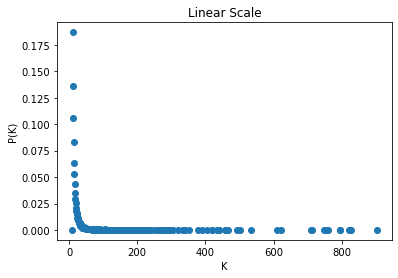

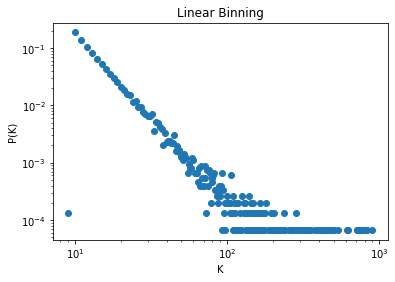

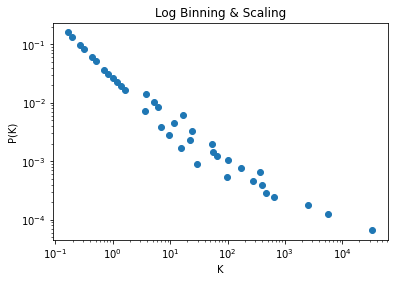

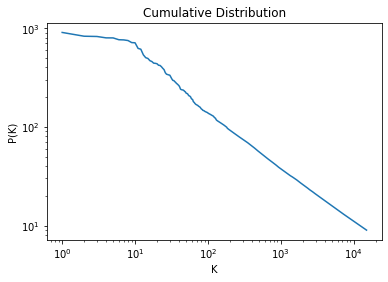

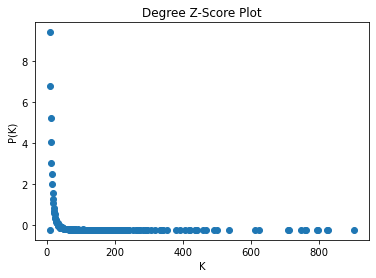

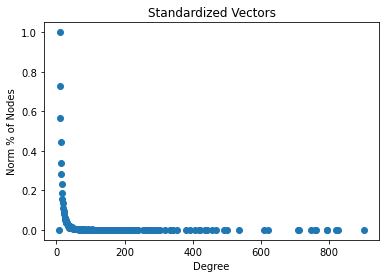

In [84]:
G = nx.powerlaw_cluster_graph(15000,10,0.25)
degreeDistro(G, 0)
degreeDistro(G, 1)
degreeDistro(G, 2)
degreeDistro(G, 3)
degreeDistro(G, 4)
degreeDistro(G, 5)


In [ ]:
x = pnGraph(G1)

In [ ]:
G4 = nx.sedgewick_maze_graph()
nx.draw(G4)

In [ ]:
pnGraph(G4)

In [ ]:
#pnGraph(G4)
degrees = sorted([G4.degree(n) for n in G4.nodes()])
degreesCount = collections.Counter(degrees)
degree,cnt = zip(*degreesCount.items())
plt.plot(degree,cnt)

In [ ]:
adjMatrixG4 = nx.to_numpy_matrix(G4)
adjMatrixG4

In [ ]:
adjDict = G4.adjacency()
for node, edges in adjDict:
    print(node,':',edges)

# pnGraph(ioGraph)

In [ ]:
# passing in normally distributed training samples
# S = [ (0,value 0), (1,value1), (0.5, value1), ... Nth]
# S`= [value 0`, value 1`]

z = np.random.normal(loc=0, scale=2, size=(100)).tolist()
y = np.random.normal(loc=0, scale=2, size=(100)).tolist()

zy = [(int(i),int(j) )for i,j in zip(z,y)]
# sns.distplot(z)
# sns.distplot(y)
# sns.distplot(zy)
G = nx.DiGraph()
G.add_edges_from(zy)
nx.draw(G)

def feel_baseLayer(data:list, layer:object) -> object:
    # python >= 3.9 = layer | data
    # newCol = df['lvl'].to_numpy()
    # newCol = [[x] for x in newCol]
    # df['lvl'] = newCol
    
    updated_layer = {**layer, **data} 
    return updated_layer